<a href="https://colab.research.google.com/github/AKUSAbeysinghe/AKUSAbeysinghe/blob/main/EMNIST_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow numpy matplotlib



In [6]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Load EMNIST balanced split
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


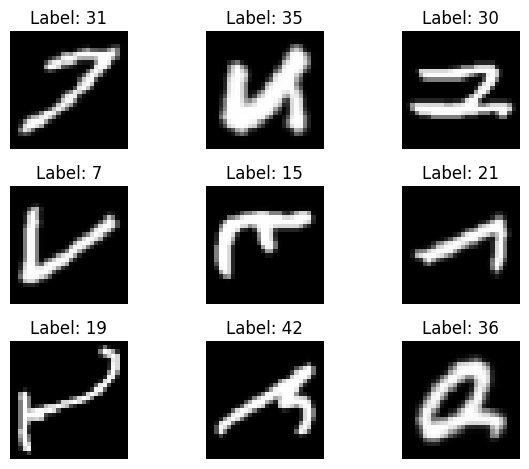

In [7]:
import matplotlib.pyplot as plt

# Function to normalize and prepare the data
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    image = tf.expand_dims(image, -1)           # Add channel dimension
    return image, label

# Apply preprocessing
ds_train = ds_train.map(preprocess).batch(32).prefetch(1)
ds_test = ds_test.map(preprocess).batch(32).prefetch(1)

# View sample images
class_names = ds_info.features['label'].names

for images, labels in ds_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')
        plt.title(f"Label: {class_names[labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,807 (897.68 KB)

 Trainable params: 229,807 (897.68 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(ds_train,
                    epochs=5,
                    validation_data=ds_test)


Epoch 1/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 110s 31ms/step - accuracy: 0.5516 - loss: 1.5666 - val_accuracy: 0.8390 - val_loss: 0.4883
Epoch 2/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 133s 28ms/step - accuracy: 0.7904 - loss: 0.6483 - val_accuracy: 0.8596 - val_loss: 0.4208
Epoch 3/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 104s 29ms/step - accuracy: 0.8156 - loss: 0.5482 - val_accuracy: 0.8656 - val_loss: 0.3911
Epoch 4/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 137s 28ms/step - accuracy: 0.8340 - loss: 0.4915 - val_accuracy: 0.8688 - val_loss: 0.3778
Epoch 5/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 98s 28ms/step - accuracy: 0.8431 - loss: 0.4577 - val_accuracy: 0.8716 - val_loss: 0.3790


In [10]:
loss, accuracy = model.evaluate(ds_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


588/588 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8732 - loss: 0.3673
Test accuracy: 87.16%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


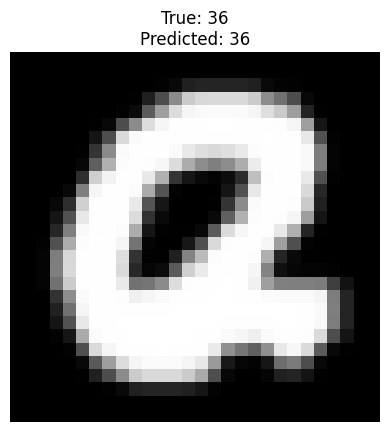

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Take one batch from test set
for images, labels in ds_test.take(1):
    image = images[0]
    label = labels[0].numpy()

    # Model prediction
    pred_probs = model.predict(tf.expand_dims(image, 0))
    pred_label = np.argmax(pred_probs)

    # Show image
    plt.imshow(tf.squeeze(image), cmap='gray')
    plt.title(f"True: {ds_info.features['label'].names[label]}\nPredicted: {ds_info.features['label'].names[pred_label]}")
    plt.axis('off')
    plt.show()


In [12]:
model.save('emnist_cnn_model.h5')


In [13]:
model.save('emnist_cnn_model.keras')
print("Model saved in native Keras format as emnist_cnn_model.keras")


Model saved in native Keras format as emnist_cnn_model.keras


In [14]:
!ls -lh


total 5.4M
-rw-r--r-- 1 root root 2.7M Jun 28 19:43 emnist_cnn_model.h5
-rw-r--r-- 1 root root 2.7M Jun 28 19:43 emnist_cnn_model.keras
drwxr-xr-x 1 root root 4.0K Jun 26 13:35 sample_data


In [15]:
model.save('emnist_cnn_model.h5')
print("Model saved as emnist_cnn_model.h5")


Model saved as emnist_cnn_model.h5


In [16]:
model.save('emnist_cnn_model.h5')
print("Model saved as emnist_cnn_model.h5")


Model saved as emnist_cnn_model.h5


In [17]:
!ls -lh


total 5.4M
-rw-r--r-- 1 root root 2.7M Jun 28 19:48 emnist_cnn_model.h5
-rw-r--r-- 1 root root 2.7M Jun 28 19:43 emnist_cnn_model.keras
drwxr-xr-x 1 root root 4.0K Jun 26 13:35 sample_data


In [18]:
from tensorflow.keras.models import load_model

loaded_model = load_model('emnist_cnn_model.h5')
print("Loaded .h5 model successfully.")


Loaded .h5 model successfully.


In [19]:
loaded_model = load_model('emnist_cnn_model.keras')
print("Loaded .keras model successfully.")


Loaded .keras model successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [20]:
from google.colab import files
files.download('emnist_cnn_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker to upload your .h5 file


Saving emnist_cnn_model.h5 to emnist_cnn_model (1).h5


In [22]:
from tensorflow.keras.models import load_model

loaded_model = load_model('emnist_cnn_model.h5')
print("Model loaded successfully.")


Model loaded successfully.


In [23]:
from tensorflow.keras.models import load_model

loaded_model = load_model('emnist_cnn_model.h5')
print("Model loaded successfully.")


Model loaded successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


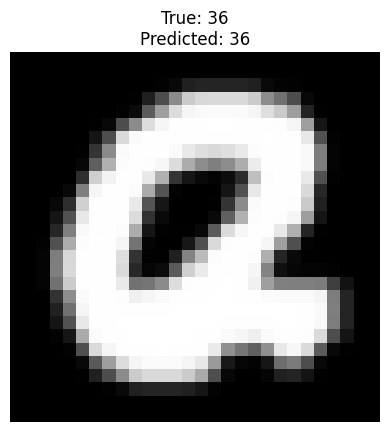

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Take one batch from the test dataset
for images, labels in ds_test.take(1):
    image = images[0]  # first image
    true_label = labels[0].numpy()

    # Predict using the loaded model
    pred_probs = loaded_model.predict(tf.expand_dims(image, 0))
    pred_label = np.argmax(pred_probs)

    # Show image with true and predicted label
    plt.imshow(tf.squeeze(image), cmap='gray')
    plt.title(f"True: {ds_info.features['label'].names[true_label]}\nPredicted: {ds_info.features['label'].names[pred_label]}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


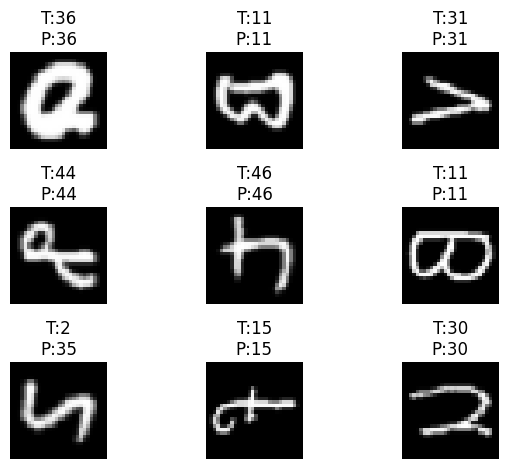

In [25]:
for images, labels in ds_test.take(1):
    for i in range(9):
        image = images[i]
        true_label = labels[i].numpy()

        pred_probs = loaded_model.predict(tf.expand_dims(image, 0))
        pred_label = np.argmax(pred_probs)

        plt.subplot(3, 3, i+1)
        plt.imshow(tf.squeeze(image), cmap='gray')
        plt.title(f"T:{ds_info.features['label'].names[true_label]}\nP:{ds_info.features['label'].names[pred_label]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [26]:
loss, accuracy = loaded_model.evaluate(ds_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


588/588 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8732 - loss: 0.3673
Test Accuracy: 87.16%


In [27]:
from google.colab import files
uploaded = files.upload()  # Choose your handwritten image file (e.g., 'my_letter.png')


Saving my_writting.png to my_writting.png


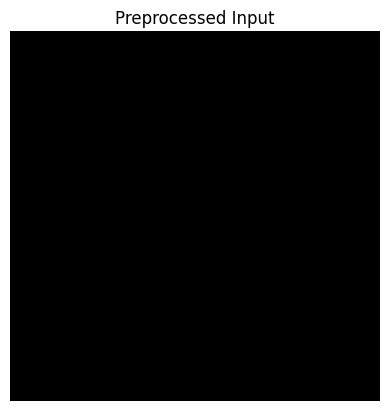

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image

# Load image using OpenCV or Keras
img_path = 'my_writting.png'  # Replace with your uploaded filename
img = keras_image.load_img(img_path, color_mode="grayscale", target_size=(28, 28))
img_array = keras_image.img_to_array(img)

# Invert image colors if background is white and character is black
img_array = 255 - img_array

# Normalize and reshape
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Show preprocessed image
plt.imshow(img_array[0].squeeze(), cmap='gray')
plt.title("Preprocessed Input")
plt.axis('off')
plt.show()


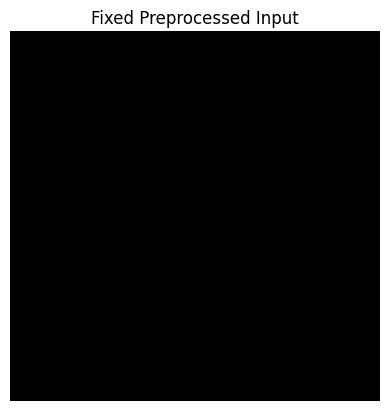

In [32]:
from tensorflow.keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt
import numpy as np

# Load your image (don't invert)
img_path = 'my_writting.png'
img = keras_image.load_img(img_path, color_mode="grayscale", target_size=(28, 28))
img_array = keras_image.img_to_array(img)

# Normalize and reshape
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Show the image
plt.imshow(img_array[0].squeeze(), cmap='gray')
plt.title("Fixed Preprocessed Input")
plt.axis('off')
plt.show()


In [36]:
from google.colab import files
uploaded = files.upload()  # Choose your handwritten image file (e.g., 'my_letter.png')


Saving TestW.png to TestW.png


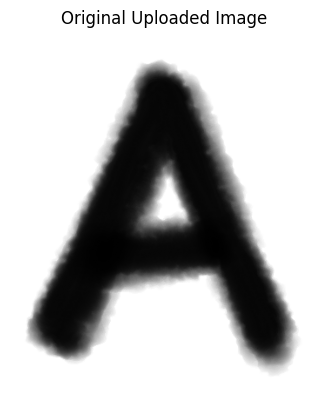

In [37]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = 'TestW.png'
original_img = Image.open(img_path).convert('L')  # Convert to grayscale

plt.imshow(original_img, cmap='gray')
plt.title("Original Uploaded Image")
plt.axis('off')
plt.show()


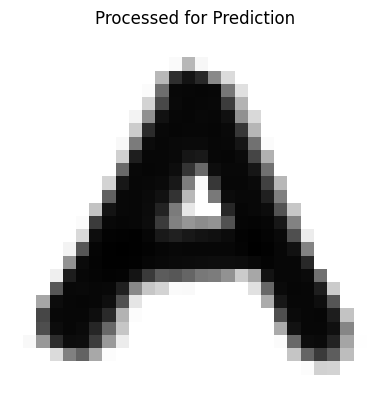

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image

# Resize to 28x28 and convert to grayscale
img = keras_image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = keras_image.img_to_array(img)

# Normalize the pixel values
img_array = img_array / 255.0

# If the character is dark on light background, keep it as-is.
# If the character is light on dark background, uncomment this line:
# img_array = 1.0 - img_array

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Show processed image
plt.imshow(img_array[0].squeeze(), cmap='gray')
plt.title("Processed for Prediction")
plt.axis('off')
plt.show()


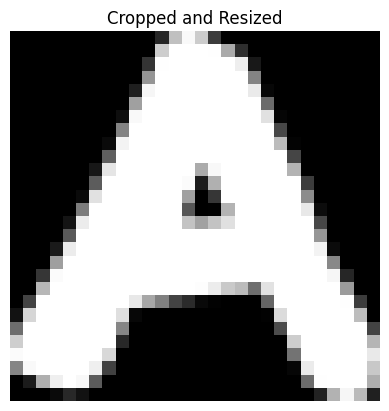

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load image in grayscale
img_path = 'TestW.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Invert (make background black if needed)
img = 255 - img

# Threshold to binary image
_, thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

# Find bounding box of the character
coords = cv2.findNonZero(thresh)
x, y, w, h = cv2.boundingRect(coords)

# Crop the region containing the character
cropped = thresh[y:y+h, x:x+w]

# Resize the cropped image to 28x28
resized = cv2.resize(cropped, (28, 28), interpolation=cv2.INTER_AREA)

# Normalize
normalized = resized / 255.0

# Reshape for prediction
input_img = normalized.reshape(1, 28, 28, 1)

# Show final image being used for prediction
plt.imshow(normalized, cmap='gray')
plt.title("Cropped and Resized")
plt.axis('off')
plt.show()


In [41]:
model.save("emnist_cnn_model.h5")


In [42]:
model.save("emnist_cnn_model.keras")
